# Deutsch Algorithm

It's a sigle qubit algorithm to verify if the unitary function is balanced or constant. If constant then the output value is same for both inputs {0,1} and balanced then the output is different for both inputs.

## Equation

$$
\begin{equation*}
\begin{aligned}

\ket{q_0q_1} &= \ket{00} \\
\ket{q_0} \otimes \ket{X|q_1} &= \ket{0} \ket{1} \\
\ket{H|q_0} \otimes \ket{H|X|q_1} &= \ket{+} \ket{-} \\
&= \tfrac{1}{\sqrt2}(\ket{0} \ket{-} + \ket{1} \ket{-}) \\
\ket{U_f|H|q_0} \otimes \ket{U_f|H|X|q_1} &= \tfrac{1}{\sqrt2}(U_f\ket{0} \ket{-} + U_f\ket{1} \ket{-}) \\[6pt]
\textbf{Phase Oracle: } \\
U_f\ket{x} \ket{-} &= (-1)^{f(x)} \ket{x} \ket{-} \\[6pt]
\textbf{Hence: } \\
\ket{U_f|H|q_0} \otimes \ket{U_f|H|X|q_1} &= \tfrac{1}{\sqrt2}\left[(-1)^{f(0)} \ket{0} \ket{-} + (-1)^{f(1)} \ket{1} \ket{-}\right] \\
&= \tfrac{1}{\sqrt2}\left[(-1)^{f(0)} \ket{0} + (-1)^{f(1)} \ket{1}\right] \otimes \ket{-}
\end{aligned}
\end{equation*}
$$

---

### Constant $( f(0) = f(1) )$

$$
\begin{equation*}
\begin{cases}
\ket{+}, & f(0) = f(1) = 0 \\
\ket{+}, & f(0) = f(1) = 1
\end{cases}
\end{equation*}
$$

---

### Balanced $( f(0) \neq f(1) )$

$$
\begin{equation*}
\begin{cases}
\ket{-}, & f(0) = 0, f(1) = 1 \\
\ket{-}, & f(0) = 1, f(1) = 0
\end{cases}
\end{equation*}
$$

---

### Final Measurement

$$
\begin{equation*}
\begin{cases}
\ket{0}, & \ket{\psi_x} = \ket{+} \\
\ket{1}, & \ket{\psi_x} = \ket{-}
\end{cases}
\end{equation*}
$$


## Phase oracle
Given any two inputs {x, y} and a function f(x) applied to one input then the output is the same as input but with a phase kick back, which allows the f(x) to be reversible unitary function.

$$
\begin{equation*}
\begin{aligned}

U_f\ket{x} &= \braket{x | U_f | x} \\ 
U_f\ket{y} &= \braket{y \oplus f(x) | U_f | y} \\

\textbf{If: } \\ \ket{y} &= 0 \\

\textbf{Then: } \\
U_f \ket{x}\ket{0} &= \ket{x} \ket{0 \oplus f(x)} \\
U_f \ket{x}\ket{0} &= \ket{x} \ket{f(x)} \\

\textbf{Because: } \\
0 \oplus 0 &= 0 \\
0 \oplus 1 &= 1 \\

\oplus \textbf{ is XOR Gate, therefore: } \\

y \oplus f(x) &=
\begin{cases}
f(x), & y = 0 \\
\overline{f(x)}, & y = 1
\end{cases} \\

\textbf{Example: } \\
U_f \ket{x} \ket{-} 
&= U_f \left[ \tfrac{1}{\sqrt{2}} (\ket{x} \ket{0} - \ket{x} \ket{1}) \right] \\
&= \tfrac{1}{\sqrt{2}} \left( U_f \ket{x} \ket{0} - U_f \ket{x} \ket{1} \right) \\
&= \tfrac{1}{\sqrt{2}} \left( \ket{x} \ket{f(x)} - \ket{x} \ket{\overline{f(x)}} \right) \\

\textbf{Thus: } \\
U_f \ket{x} \ket{-} &=
\begin{cases}
\ket{x} \ket{-}, & f(x) = 0 \\
-\,\ket{x} \ket{-}, & f(x) = 1
\end{cases} \\

\textbf{Phase Oracle: } \\
U_f \ket{x} \ket{-} &= (-1)^{f(x)} \ket{x} \ket{-}

\end{aligned}
\end{equation*}
$$

In [ ]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer, AerSimulator
from qiskit.visualization import plot_histogram
from qiskit_ibm_runtime.fake_provider import FakeManilaV2

import matplotlib.pyplot as plt
from IPython.display import display

## Constant Oracles $f(x)$

$$
\begin{equation*}
\begin{aligned}

\text{For: } \\ &f(0) = f(1) \\[6pt]

\text{If f(x) is constant 0: } \\
&f(x) =
\begin{cases}
0, & x = 0 \\
0, & x = 1
\end{cases} \\

\text{If f(x) is constant 1: } \\
&f(x) =
\begin{cases}
1, & x = 0 \\
1, & x = 1
\end{cases}

\end{aligned}
\end{equation*}
$$

In [ ]:
def const_0():
    qc = QuantumCircuit(2)
    return qc

def const_1():
    qc = QuantumCircuit(2)
    # flipped q1 to 1 which stays the same
    qc.x(1)
    return qc

## Balanced Oracles $f(x)$

$$
\begin{equation*}
\begin{aligned}

&f(0) \neq f(1) \\[6pt]
\text{For Identity f(x): } \\
&f(x) =
\begin{cases}
0, & x = 0 \\
1, & x = 1
\end{cases} \\

\text{For Not f(x): } \\
&f(x) =
\begin{cases}
1, & x = 0 \\
0, & x = 1
\end{cases}

\end{aligned}
\end{equation*}
$$

In [28]:
def identity():
    qc = QuantumCircuit(2)
    qc.cx(0, 1)
    return qc

def balanced_not():
    qc = QuantumCircuit(2)
    # entangle and then flip q1
    qc.cx(0, 1)
    qc.x(1)
    return qc

In [29]:
# Main Deutsch algorithm
def deutsch_algorithm(oracle):
    # Create circuit with 2 qubits and 1 classical bit
    qc = QuantumCircuit(2, 1)
    
    # Step 1: Initialize qubit 1 to |1⟩
    qc.x(1)
    
    qc.barrier()

    # Step 2: Apply Hadamard gates to both qubits
    qc.h([0, 1])
    
    qc.barrier()
    
    # Step 3: Apply the oracle
    qc = qc.compose(oracle)
    
    qc.barrier()
    
    # Step 4: Apply Hadamard to qubit 0
    qc.h(0)
    
    # Step 5: Measure qubit 0
    qc.measure(0, 0)
    
    return qc



constant_0: {'0': 1000}
Constant


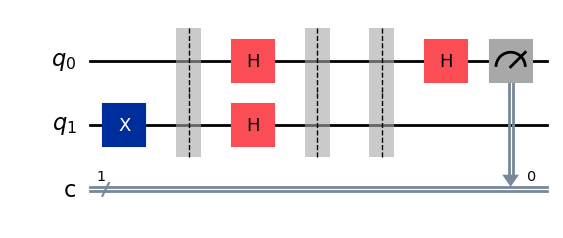

constant_1: {'0': 1000}
Constant


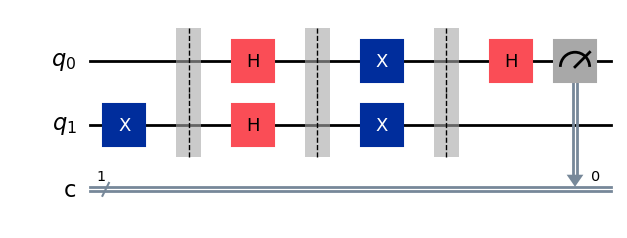

balanced_identity: {'1': 1000}
Balanced


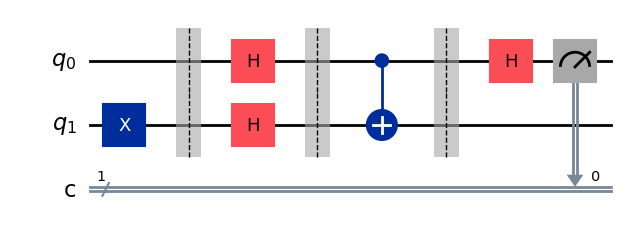

balanced_not: {'1': 1000}
Balanced


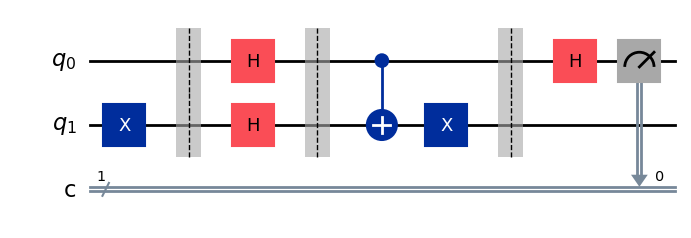

In [39]:
# Test all oracles
oracles = {
    'constant_0': const_0(),
    'constant_1': const_1(),
    'balanced_identity': identity(),
    'balanced_not': balanced_not()
}

simulator = AerSimulator()
for name, oracle in oracles.items():
    # Create and run circuit
    circuit = deutsch_algorithm(oracle)
    # Transpile and simulate
    transpiled = transpile(circuit, simulator)
    result = simulator.run(transpiled, shots=1000).result()
    counts = result.get_counts()
    
    print(f"{name}: {counts}")
    
    for key in counts:
        if key == '0':
            print("Constant")
        else:
            print("Balanced")
        display(circuit.draw('mpl'))

    # Draw one example circuit
    # if name == 'balanced_identity':
    #     display(circuit.draw('mpl'))